# Detailed Question Analysis: *Item Response Theory (IRT)*

- IRT models the complex interplay between individual test takers and question items
- Probability of a correct response is a function of a latent "DQL ability" variable (theta) and each question's _discrimination_ and _difficulty_
- Some items are more informative than others, and at different levels of test taker latent ability
- Similarities with factor analysis & logit/probit models

### Load libraries, read data

In [19]:
options(warn = -1)  #warnings clutter presentation, normally not a good practice
library(ggplot2)
options(repr.plot.width=12, repr.plot.height=8)

library(mirt)  # one of several excellent libraries in R for doing IRT
library(ggmirt) # extension to mirt that allows ggplot2 visualization of models

#Read csv file with question cores as correct/wrong (1/0) integers
qscores <- read.csv("C:/Users/brian_local/PS_demo/qscores.csv", colClasses = c("integer"))

### Fit the IRT Model: 2PL, difficulty (a) and discrimination (b),  but no guessing, because guessing is presumably impossible here

In [20]:
unimodel <- 'F1 = 1-13'  # ie, Qs 2-14
fit2PL <- mirt(data = qscores, 
               model = unimodel,  # Explain what that means here eventually
               itemtype = "2PL", 
               verbose = FALSE)

### Factor loadings (F1) measure strength of relationship between item factors and posited latent factor; h2 is F1^2 and represents variance in each item accounted for by latent factor
Relationships are all strong, which is good in general, but implies high correlation among items, which implies redundant questions and makes model estimation more difficult

In [21]:
summary(fit2PL)

       F1    h2
Q2  0.978 0.956
Q3  0.990 0.981
Q4  0.975 0.951
Q5  0.964 0.930
Q6  0.972 0.944
Q7  0.967 0.936
Q8  0.961 0.924
Q9  0.988 0.977
Q10 0.997 0.994
Q11 0.966 0.933
Q12 0.979 0.959
Q13 0.901 0.812
Q14 0.946 0.896

SS loadings:  12.192 
Proportion Var:  0.938 

Factor correlations: 

   F1
F1  1


## Main Event: IRT parameters
Presents differentiation levels (a), where steep slope = better differentiation, and difficulty (b), which shows theta level that corresponds with a .50 probability of correct response.  (Guessing -- _g_ -- is pre-specified to be zero because if takers need to write code and grading is all-or-none, then guessing is essentially impossible.)

In [22]:
params2PL <- coef(fit2PL, IRTpars = TRUE, simplify = TRUE)
round(params2PL$items, 2)

,a,b,g,u
Q2,7.98,-1.55,0,1
Q3,12.14,-1.49,0,1
Q4,7.50,-1.53,0,1
Q5,6.21,-1.44,0,1
Q6,6.98,-1.14,0,1
Q7,6.49,-1.09,0,1
Q8,5.92,-1.12,0,1
Q9,11.06,-1.24,0,1
Q10,22.58,-1.21,0,1
Q11,6.34,-1.11,0,1


# Evaluation:  Evidence of Model and Item fit
## Model Fit
Model fit- Evidence of issues, somewhat mixed bag: M2 significant, but low RMSEA & TLI, CFI close to 1; suspect it relates to high correlation among items

In [23]:
M2(fit2PL)[0:3]

,M2,df,p
,<dbl>,<int>,<dbl>
stats,158.7335,65,8.283518e-10


In [24]:
M2(fit2PL)[4:9]

,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,0.04721049,0.03791812,0.0565313,0.04890941,0.9953241,0.9961034


## Item Fit 
- Item fit is a mixed bag as well 
- smaller is better for S_X2 
- p(S_X2) should be > 0.05 (or whatever alpha you preset)
- Q12 and Q6 are dubious
- Q3 couldn't be estimated due to 0 degrees of freedom, probably because of a perfect fit (everyone below a certain theta got Q3 wrong and everyone above got it correct).  ~~To Do: Verify this~~ [X]

In [25]:
itemfit(fit2PL)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Q2,0.9389302,1,0.000000000,0.332553125
Q3,NaN,0,NaN,NaN
Q4,0.5645302,2,0.000000000,0.754073749
Q5,7.6091125,4,0.037343763,0.106993030
Q6,12.9000941,5,0.049417297,0.024333200
Q7,5.0581533,6,0.000000000,0.536376482
Q8,21.8915886,6,0.063981717,0.001266878
Q9,5.1460628,3,0.033251286,0.161408869
Q10,3.6751748,1,0.064301920,0.055228464


# Visualizing Item and Test Characteristics

__Note that on all subsequent plots Q<sub>n</sub> = Item <sub>n-1<sub>__

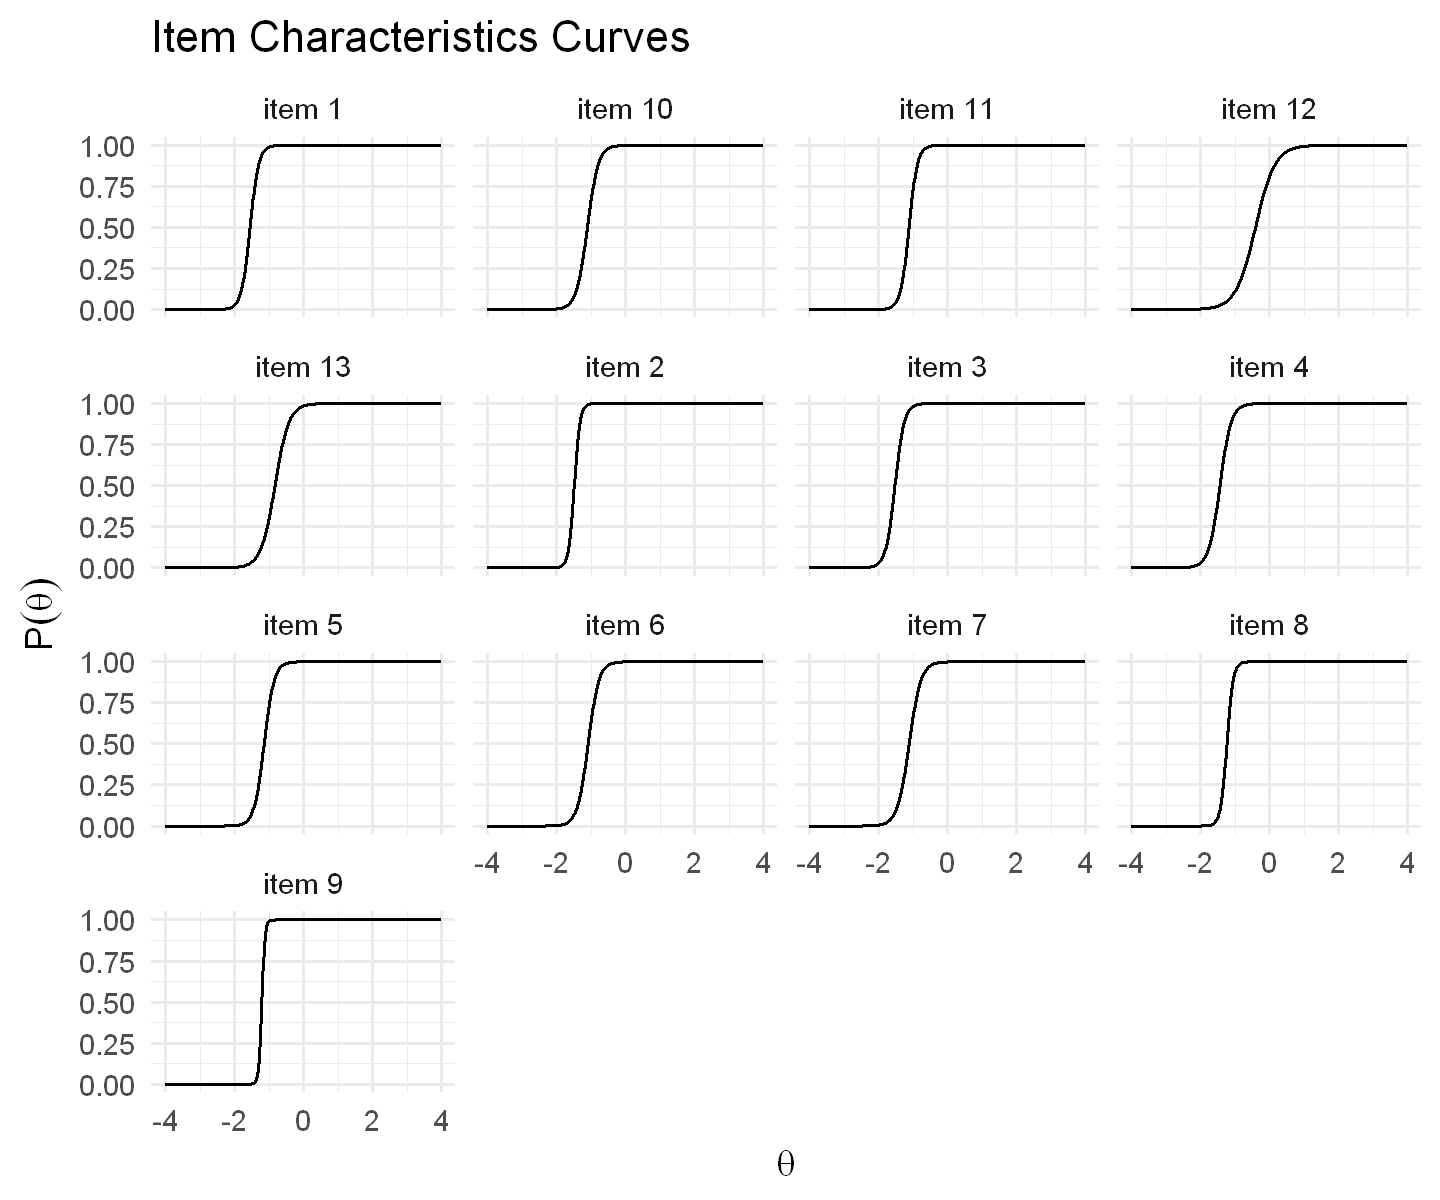

In [26]:
options(repr.plot.width=12, repr.plot.height=10)
tracePlot(fit2PL) + theme_minimal(base_size = 22)+ geom_line(size = 1) 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


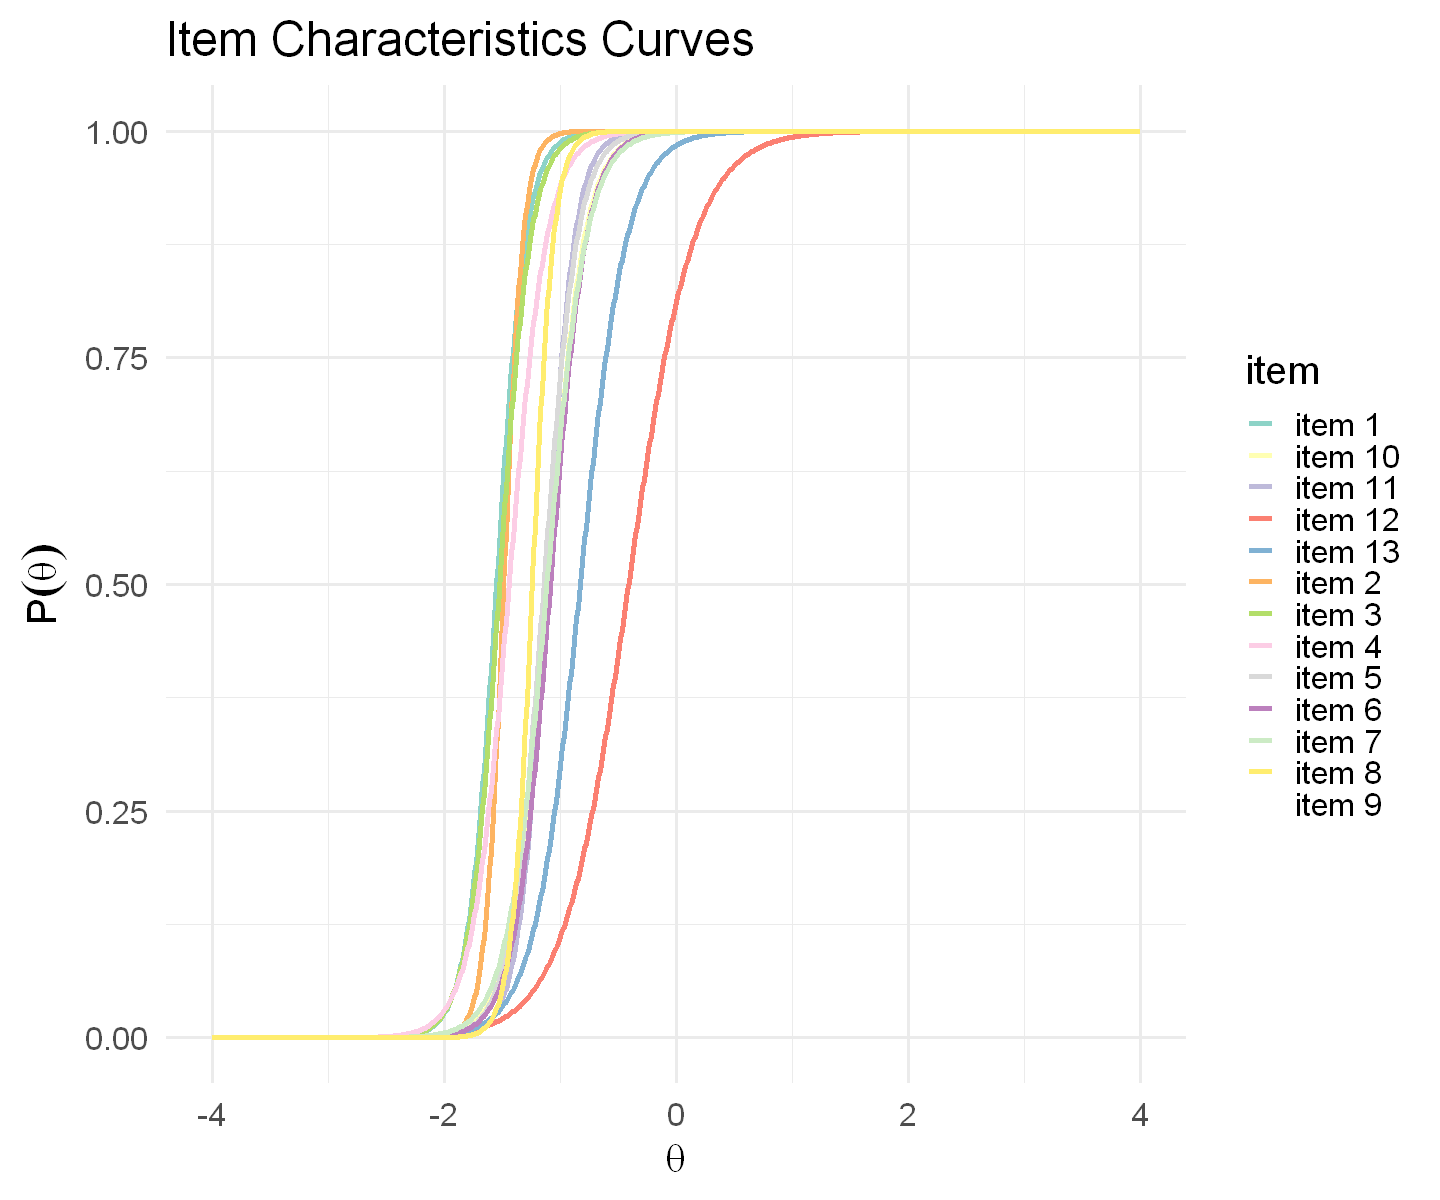

In [27]:
tracePlot(fit2PL, facet = F, legend = T)+ scale_color_brewer(palette = "Set3") + theme_minimal(base_size = 24)+ geom_line(size = 1.5) 

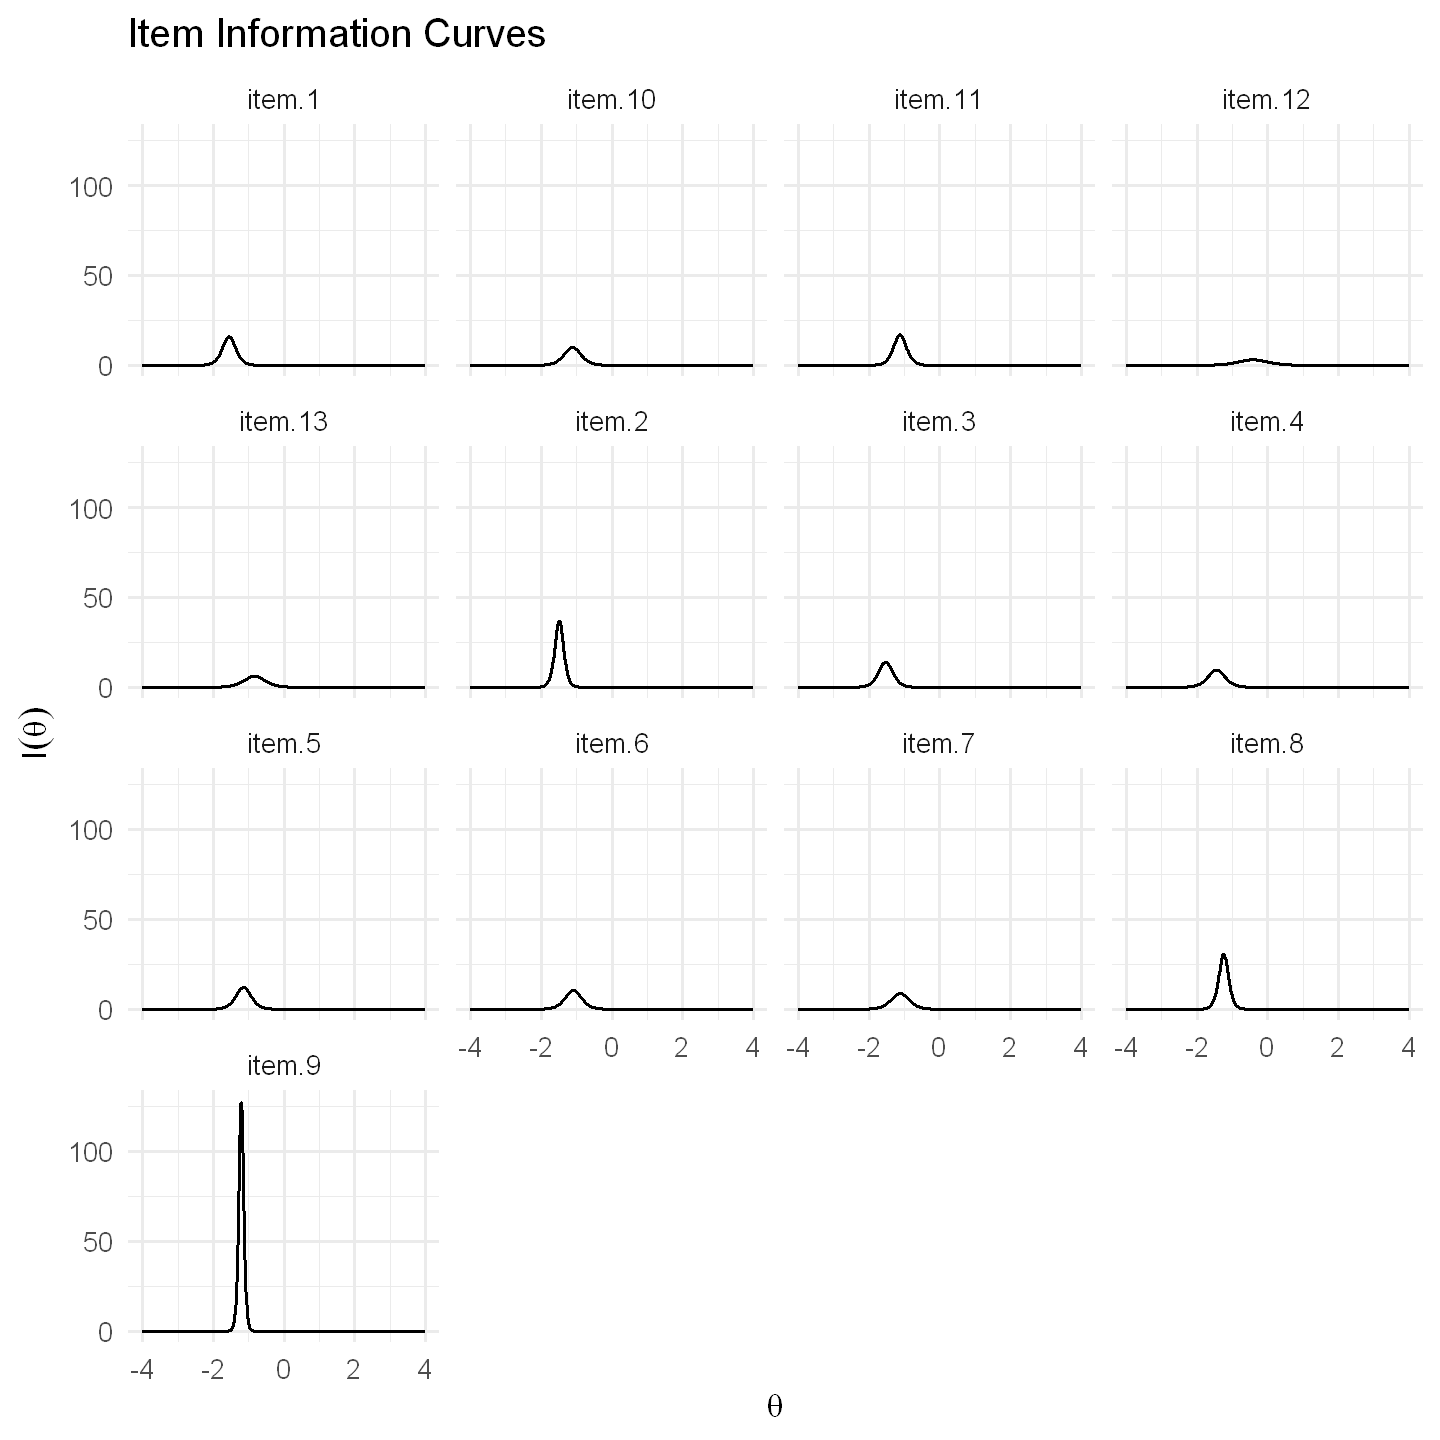

In [28]:
options(repr.plot.width=12, repr.plot.height=12)
itemInfoPlot(fit2PL, facet = T)+ theme_minimal(base_size = 20) + geom_line(size = 1) 

# Information Plots
Item quality can also be expressed by representing the statistical *information* (I) an item provides.  Higher information --> more accurate score estimates.  The information a given question provides varies by student DQL ability (ie, theta)

__Note again that Q<sub>n</sub> = Item <sub>n-1<sub>__
    

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


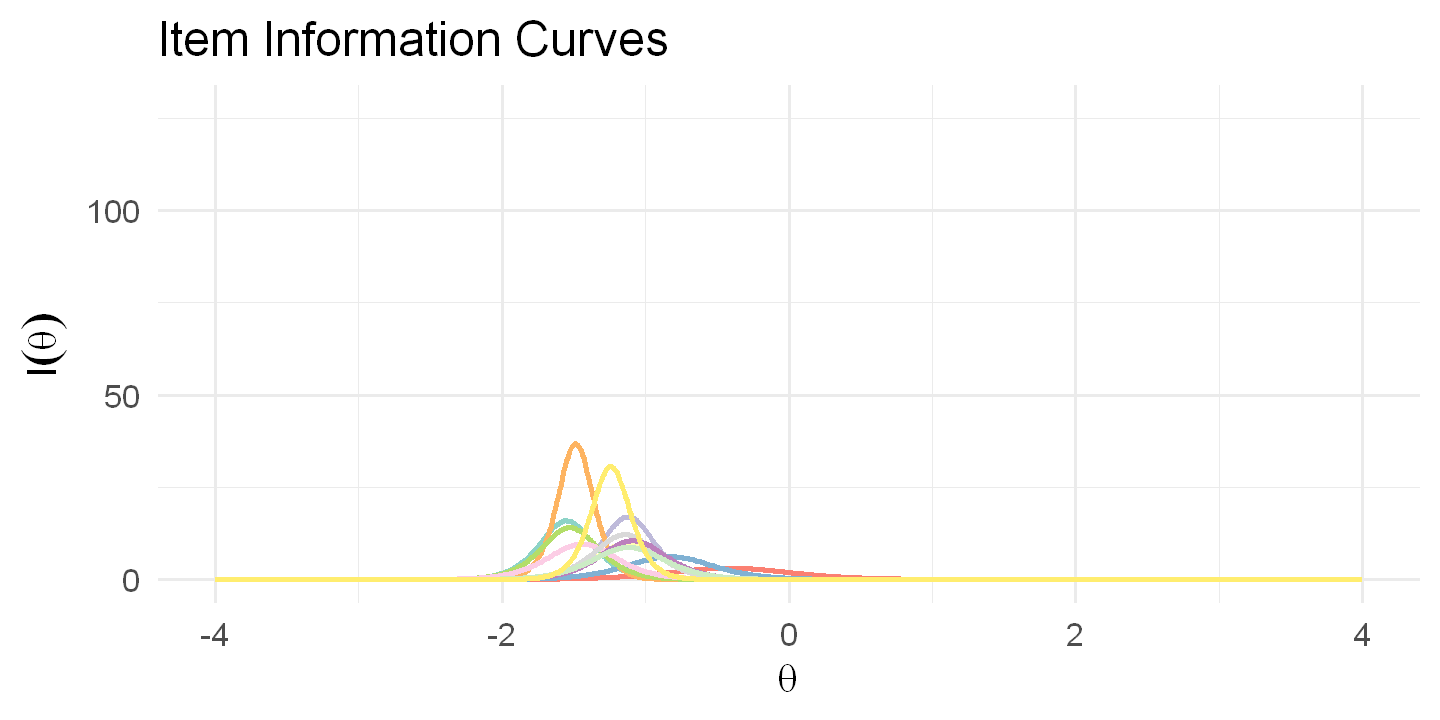

In [29]:
options(repr.plot.width=12, repr.plot.height=6)
itemInfoPlot(fit2PL) + scale_color_brewer(palette = "Set3") + theme_minimal(base_size = 24)+ geom_line(size = 1.5) 

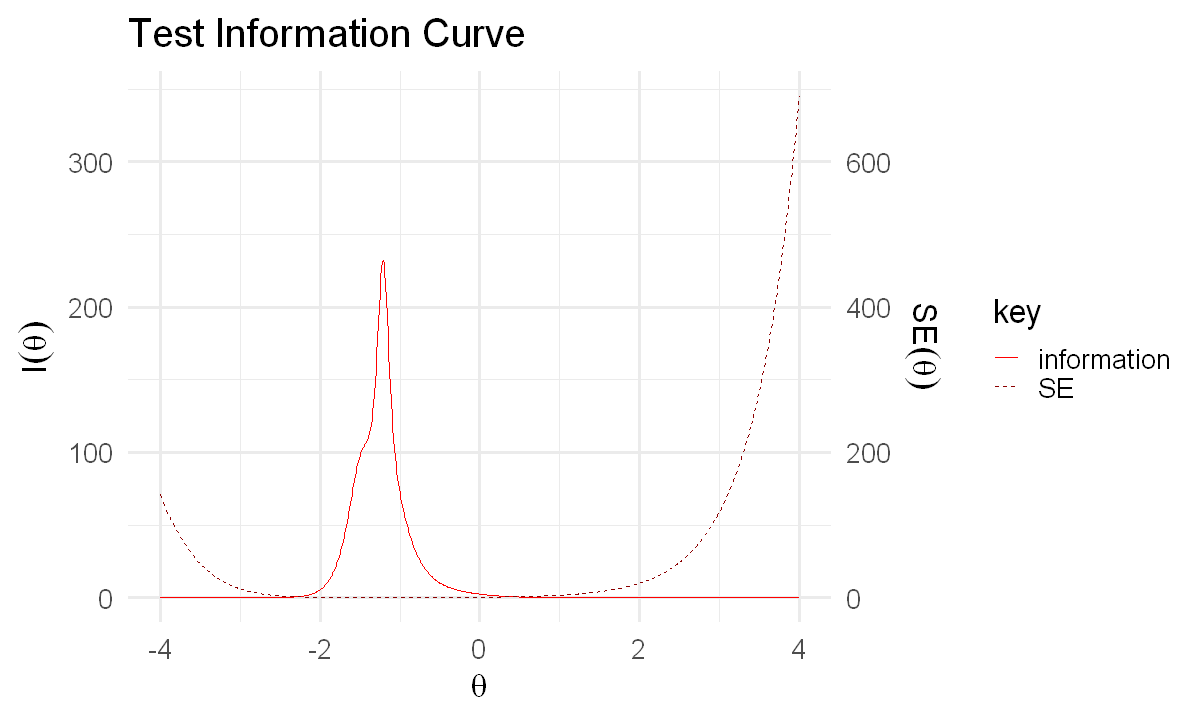

In [30]:
options(repr.plot.width=10, repr.plot.height=6)
testInfoPlot(fit2PL, adj_factor = 2) + theme_minimal(base_size = 20) 

# Bottom Line Takeaways
- Test appears on the whole excellent at delineating test takers, but *almost exclusively at a relatively low level of overall DQL ability*
- Test is less good at distinguishing at high levels of performance
- Per IRT, this is a reflection of both the test and its takers simultaneously
- If this is a certification test or certification test prep, where questions are externally imposed, these results are outstanding
- If this is a home-grown test, this analysis indicates a real opportunity to improve ability measurement across full spectrum of expected test taker ability
- 80/20 rule again:  much of this is apparent from a histogram of test scores, albeit much more informally & intuitively

# Areas for Future Investigation
- Explore alternative IRT models (eg Rasch)
- Comparisons to Classical Test Theory (CTT)
- Specify a multidimensional model that measures multiple latent ability factors (maybe per tags in original data)
